# Data-Science Case Study – Multi-classification 

In [1]:
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
X.head()

,id,AP,creation_date_answer,situation,ctc,location,gc_id,gc_label,creation_date_global,id_group,...,fruits_or_vegetables,number_of_fruit,id_group_3,creation_date_request,hobby,id_group_4,ville,green_vegetables,vegetable_type,target
0,a46cfa61ea20a,f,2019-03-13 11:14:42.549,-1,NaN,52,70,G,2019-01-17 10:50:57.767,2d7e206d46ea1,...,NaN,-1,812a43d710ace,2019-03-13 11:14:42.549,football,aa8f4934a31eb,NaN,f,NaN,0
1,c3d0cb8f0c5e2,f,2019-03-21 14:27:32.441,-1,NaN,78,10,A,2018-08-20 05:57:51.038,35e96d6848871,...,NaN,-1,4b59257f24573,2019-03-21 14:27:32.441,football,6ff9ea9ec85fd,NaN,f,NaN,1
2,05dfbe0ec3a8b,f,2019-03-15 17:49:50.67,-1,NaN,70,10,A,2018-12-20 13:45:51.752,ffaf8085e383d,...,NaN,-1,f1a838f0d194b,2019-03-15 17:49:50.67,football,6a49a0a97b049,NaN,f,NaN,0
3,952e869ee1076,f,2019-01-07 08:19:29.114,-1,f,84,10,A,2018-07-21 10:28:49.386,5360cf0a40ce3,...,NaN,0,c3196847d1c14,2019-01-07 08:19:29.114,football,d0dcf1ca1bf04,NaN,f,NaN,1
4,5bd0e71b1395b,f,2019-02-03 17:57:22.926,-1,NaN,29,20,D,2018-12-07 19:59:26.968,126c3211f23fc,...,NaN,-1,70e18c6fe58cd,2019-02-03 17:57:22.926,football,b4870b1c8eb42,NaN,f,NaN,1


In [4]:
test

,id,AP,creation_date_answer,situation,ctc,location,gc_id,gc_label,creation_date_global,id_group,...,fruit_situation_label,fruits_or_vegetables,number_of_fruit,id_group_3,creation_date_request,hobby,id_group_4,ville,green_vegetables,vegetable_type
0,cb7a4e0dd0777,f,2019-03-13 07:00:52.562,30,NaN,100,40,B,2019-03-13 07:03:13.632,b6a3d931cbbaf,...,jzy,t,1,bc3a12cac647f,2019-03-13 07:00:52.562,football,b78bd3c9f945c,Saint-Leu,f,NaN
1,e78e3915f3e30,f,2019-01-07 13:45:55.741,-1,f,95,40,B,2018-12-18 18:28:41.942,1b35749232404,...,hetz,t,1,79aa2c96bd0fc,2019-01-07 13:45:55.741,football,6fed1653be26d,Créteil,f,NaN
2,8e65ba155f983,f,2019-01-25 14:01:07.041,-1,f,34,20,D,2018-01-17 13:12:05.124,8f7612ff2c9cc,...,ag,NaN,-1,4b634a698cc8e,2019-01-25 14:01:07.041,football,fb7b5da2ef839,Bordeaux,f,NaN
3,701e90ca03ce2,f,2019-01-16 14:35:11.432,10,f,45,40,B,2018-11-07 13:21:33.877,2e3620e03b5f3,...,ag,NaN,2,cccd30d947857,2019-01-16 14:35:11.432,football,3a230e52fb02e,Saint-Herblain,f,NaN
4,768fefec8609a,f,2019-02-11 14:25:37.331,10,f,95,100,H,2018-10-16 10:17:01.716,ac19c1e8abd0d,...,hetz,f,2,62769fb7addda,2019-02-11 14:25:37.331,football,94c376f28ea60,Drancy,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3232bad9c00cc,f,2019-02-11 09:06:49.715,-1,f,60,10,A,2019-02-08 15:55:22.838,95a56d824dd8e,...,ag,f,0,62f3ff83bc692,2019-02-11 09:06:49.715,football,cfdfc4bae9d99,NaN,f,NaN
24996,7b178c38ad263,f,2019-01-23 09:56:24.209,-1,f,45,10,A,2018-12-18 11:07:20.750,0a862475e1701,...,ag,f,-1,cccd30d947857,2019-01-23 09:56:24.209,football,f3c523cde1292,Nantes,f,NaN
24997,5876ad905d4b4,f,2019-03-10 07:23:42.048,-1,NaN,58,10,A,2019-02-27 11:22:12.462,02d8284246fca,...,ae,NaN,-1,fa2eb9a81317a,2019-03-10 07:23:42.048,football,c2ac6810f81b5,NaN,f,NaN
24998,5921ef2921c68,f,2019-02-27 16:28:57.107,-1,NaN,60,20,D,2018-08-09 08:23:06.305,68fb52f788708,...,ag,NaN,-1,eefd8c1c28728,2019-02-27 16:28:57.107,football,aeaa1f918497c,NaN,t,green


In [5]:
X.dtypes

id                       object
AP                       object
creation_date_answer     object
situation                 int64
ctc                      object
location                  int64
gc_id                     int64
gc_label                 object
creation_date_global     object
id_group                 object
id_group_2               object
favorite_fruit           object
fruit_situation_id        int64
fruit_situation_label    object
fruits_or_vegetables     object
number_of_fruit           int64
id_group_3               object
creation_date_request    object
hobby                    object
id_group_4               object
ville                    object
green_vegetables         object
vegetable_type           object
target                    int64
dtype: object

In [6]:
X.isna().sum()

id                           0
AP                           0
creation_date_answer         0
situation                    0
ctc                      15380
location                     0
gc_id                        0
gc_label                     0
creation_date_global         0
id_group                     0
id_group_2                   0
favorite_fruit               0
fruit_situation_id           0
fruit_situation_label     1728
fruits_or_vegetables     17341
number_of_fruit              0
id_group_3                   0
creation_date_request        0
hobby                        0
id_group_4                   0
ville                    16912
green_vegetables             0
vegetable_type           24586
target                       0
dtype: int64

In [7]:
for column in X:
    print(column, len(X[column].unique()))

id 25000
AP 2
creation_date_answer 24278
situation 8
ctc 3
location 99
gc_id 12
gc_label 12
creation_date_global 15680
id_group 15844
id_group_2 15675
favorite_fruit 2
fruit_situation_id 22
fruit_situation_label 22
fruits_or_vegetables 3
number_of_fruit 9
id_group_3 872
creation_date_request 24280
hobby 3
id_group_4 15831
ville 565
green_vegetables 2
vegetable_type 7
target 4


In [8]:
for column in test:
    print(column, len(X[column].unique()))

id 25000
AP 2
creation_date_answer 24278
situation 8
ctc 3
location 99
gc_id 12
gc_label 12
creation_date_global 15680
id_group 15844
id_group_2 15675
favorite_fruit 2
fruit_situation_id 22
fruit_situation_label 22
fruits_or_vegetables 3
number_of_fruit 9
id_group_3 872
creation_date_request 24280
hobby 3
id_group_4 15831
ville 565
green_vegetables 2
vegetable_type 7


All variables are categorical. It does not make sense to use linear models as this will require us to one-hot encode every feature. We should try tree-based methods instead.

## Looking at columns to keep

In [9]:
X.isna().mean()

id                       0.00000
AP                       0.00000
creation_date_answer     0.00000
situation                0.00000
ctc                      0.61520
location                 0.00000
gc_id                    0.00000
gc_label                 0.00000
creation_date_global     0.00000
id_group                 0.00000
id_group_2               0.00000
favorite_fruit           0.00000
fruit_situation_id       0.00000
fruit_situation_label    0.06912
fruits_or_vegetables     0.69364
number_of_fruit          0.00000
id_group_3               0.00000
creation_date_request    0.00000
hobby                    0.00000
id_group_4               0.00000
ville                    0.67648
green_vegetables         0.00000
vegetable_type           0.98344
target                   0.00000
dtype: float64

In [10]:
test.isna().mean()

id                       0.00000
AP                       0.00000
creation_date_answer     0.00000
situation                0.00000
ctc                      0.60588
location                 0.00000
gc_id                    0.00000
gc_label                 0.00000
creation_date_global     0.00000
id_group                 0.00000
id_group_2               0.00000
favorite_fruit           0.00000
fruit_situation_id       0.00000
fruit_situation_label    0.06908
fruits_or_vegetables     0.69064
number_of_fruit          0.00000
id_group_3               0.00000
creation_date_request    0.00000
hobby                    0.00000
id_group_4               0.00000
ville                    0.66736
green_vegetables         0.00000
vegetable_type           0.98204
dtype: float64

In [11]:
id_cols = ['id_group', 'id_group_2', 'id_group_3', 'id_group_4']

for id_col in id_cols:
    count = 0
    X_uniques = list( X[id_col].unique())
    test_uniques = list(test[id_col].unique())

    for id_group in test_uniques:
        if id_group in X_uniques:
            count += 1
    print(id_col, count / len(test[id_col].unique()))


id_group 0.4289937106918239
id_group_2 0.43799707323280523
id_group_3 0.9382284382284383
id_group_4 0.42896708000251776


These id columns have a lot of values in common. We should keep the values in common and encode the others as NA.

In [12]:
id_cols = ['creation_date_answer', 'creation_date_global', 'creation_date_request']

for id_col in id_cols:
    count = 0
    X_uniques = list(X[id_col].unique())
    test_uniques = list(test[id_col].unique())

    for id_group in test_uniques:
        if id_group in X_uniques:
            count += 1
    print(id_col, count / len(test[id_col].unique()))


creation_date_answer 0.023295196398331337
creation_date_global 0.43559882906961944
creation_date_request 0.02308867869976457


We should keep creation_date_global and drop the other 2 columns.

In [13]:
id_cols = ['ville']

for id_col in id_cols:
    count = 0
    X_uniques = list( X[id_col].unique())
    test_uniques = list(test[id_col].unique())

    for id_group in test_uniques:
        if id_group in X_uniques:
            count += 1
    print(id_col, count / len(test[id_col].unique()))


ville 0.7389705882352942


There are a lot of cities in common. We should keep this column and encode the values that are only in train.csv as NA.

## Looking at columns to drop

We should drop a column if the test and train datasets have no values in common. This means that this column will have no predictive power.

In [14]:
id_cols = list(X.drop(['id', 'target'], axis = 1).columns)

for id_col in id_cols:
    count = 0
    X_uniques = list(X[id_col].unique())
    test_uniques = list(test[id_col].unique())

    for id_group in test_uniques:
        if id_group in X_uniques:
            count += 1
    print(id_col, count / len(test[id_col].unique()))

AP 1.0
creation_date_answer 0.023295196398331337
situation 1.0
ctc 1.0
location 0.98989898989899
gc_id 1.0
gc_label 1.0
creation_date_global 0.43559882906961944
id_group 0.4289937106918239
id_group_2 0.43799707323280523
favorite_fruit 1.0
fruit_situation_id 1.0
fruit_situation_label 1.0
fruits_or_vegetables 1.0
number_of_fruit 0.9
id_group_3 0.9382284382284383
creation_date_request 0.02308867869976457
hobby 1.0
id_group_4 0.42896708000251776
ville 0.7389705882352942
green_vegetables 1.0
vegetable_type 1.0


> Columns to drop : 
> * creation_date_request
> * creation_date_answer 


## Processing columns

In [15]:
X_pruned = X.drop(['creation_date_answer', 'creation_date_request', 'target'], axis = 1)
test_pruned = test.drop(['creation_date_answer', 'creation_date_request'], axis = 1)

columns_to_process = ['location', 'creation_date_global', 'id_group', 'id_group_2',
                      'id_group_3','id_group_4', 'number_of_fruit', 'ville']

def remove_uncommon(column):
    """Removes values from the test database that are not in the train database from both databases."""
    X_uniques = list(X[column].unique())
    test_uniques = list(test[column].unique())
    X_keys = {key: 0 for key in X_uniques}
    uncommon_values = []
    for value in test_uniques:
        try:
            X_keys[value]
        except:
            uncommon_values.append(value)
        
    test_pruned.loc[test_pruned[column].isin(uncommon_values), column] = 'nan'
        

for column in columns_to_process:
    remove_uncommon(column)
    print(column, "done")
    

location done
creation_date_global done
id_group done
id_group_2 done
id_group_3 done
id_group_4 done
number_of_fruit done
ville done


## Categorical Encoding

When using tree based models, scaling and one-hot encoding is not necessary. We just need to encode the variables to pass them to a tree-based model.

In [ ]:
# !pip install category_encoders

In [16]:
import category_encoders as ce

In [17]:
columns_to_encode = list(X_pruned.drop('id', axis = 1).columns)

oe_encoder = ce.OrdinalEncoder(cols = columns_to_encode)

X_encoded = oe_encoder.fit_transform(X_pruned)
test_encoded = oe_encoder.transform(test_pruned)

## Database split

In [25]:
from sklearn.model_selection import train_test_split

y = X[['id', 'target']]

X_train, X_test, y_train, y_test = train_test_split(X_encoded.drop('id', axis = 1), y.drop('id', axis = 1), test_size = 0.2)

## Custom Scorer

In [26]:
def my_scorer(y_true, pred):
    """
    This scorer penalizes errors for rare classes.

    y_true and pred should be numpy arrays of shape (n, 4)
    """
    
    categories = np.array([0, 1, 2, 3])
    weights = 10**categories
    loss = - (y_true * np.log(pred)) - ((1 - y_true) * np.log(1 - pred))
    score = (loss * weights).sum(axis = 1)
    return score.mean()

## Resampling

In [27]:
y_train_dummies = pd.get_dummies(y_train['target']).to_numpy()

In [28]:
X_new = X_train.copy()
X_new['y'] = y_train['target']

X_0 = X_new[X_new['y'] == 0].copy()
X_1 = X_new[X_new['y'] == 1].copy()
X_2 = X_new[X_new['y'] == 2].copy()
X_3 = X_new[X_new['y'] == 3].copy()

In [29]:
from sklearn.utils import resample

resampled_X_1 = resample(X_1, n_samples = X_0.shape[0])
resampled_X_2 = resample(X_2, n_samples = X_0.shape[0])
resampled_X_3 = resample(X_3, n_samples = X_0.shape[0])

resampled_X_train = pd.concat([X_0, resampled_X_1, resampled_X_2, resampled_X_3])
resampled_y_train = pd.concat([X_0['y'], resampled_X_1['y'], resampled_X_2['y'], resampled_X_3['y']])

print(pd.get_dummies(resampled_X_train['y']).to_numpy().mean(axis = 0))
resampled_X_train = resampled_X_train.drop('y', axis = 1)

[0.25 0.25 0.25 0.25]


## Hyperparameter Tuning of Boosting Tree

In [30]:
# !pip install lightgbm
# !pip install optuna

In [31]:
import matplotlib.pyplot as plt
import lightgbm as lgb
import time
import optuna

This procedure optimizes our custom loss with bayesian optimization (trial and error).

In [41]:
t = time.time()
trial_count = 0
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 10, 500)
    learning_rate = trial.suggest_loguniform('learning_rate', 10**-3, 10**0)
    n_iter = trial.suggest_int('n_iter', 1, 500)
    max_leaves = trial.suggest_int('max_leaves', 1, 500)
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 1, 1000)
    num_boost_round = trial.suggest_int('num_boost_round', 1, 1000)
    
    params = {'learning_rate': learning_rate,
              'max_depth': max_depth,
              'max_leaves' : max_leaves,
              'n_iter' : n_iter,
              'min_data_in_leaf ' : min_data_in_leaf,
              'boosting': 'gbdt',
              'objective': 'multiclass',
              'num_class' : 4}
    
    model = lgb.train(params, train_set=lgb.Dataset(resampled_X_train, label=resampled_y_train), num_boost_round=num_boost_round)

    pred = model.predict(X_test)
    y_true = pd.get_dummies(y_test['target']).to_numpy()
    
    global trial_count
    trial_count += 1
    if trial_count % 10 == 0:
        print(trial_count)
    
    return my_scorer(y_true, pred)

study = optuna.create_study(direction='minimize')
optuna.logging.disable_default_handler()  # limit verbosity
study.optimize(objective, n_trials=200)

# Show best result
print(time.time() - t)
print(study.best_trial.params)
print(study.best_trial.value)

10
129.14787125587463
{'max_depth': 337, 'learning_rate': 0.058962475829051716, 'n_iter': 375, 'max_leaves': 488, 'min_data_in_leaf': 829, 'num_boost_round': 881}
83.07206252267397


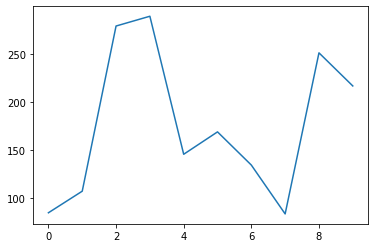

In [42]:
values = [t.value for t in study.trials]
plt.plot(values)

## Submission

In [87]:
X_new = X_encoded.drop('id', axis = 1).copy()
X_new['y'] = y['target']

X_0 = X_new[X_new['y'] == 0].copy()
X_1 = X_new[X_new['y'] == 1].copy()
X_2 = X_new[X_new['y'] == 2].copy()
X_3 = X_new[X_new['y'] == 3].copy()

resampled_X_1 = resample(X_1, n_samples = X_0.shape[0])
resampled_X_2 = resample(X_2, n_samples = X_0.shape[0])
resampled_X_3 = resample(X_3, n_samples = X_0.shape[0])

resampled_X = pd.concat([X_0.drop('y', axis = 1), resampled_X_1.drop('y', axis = 1), resampled_X_2.drop('y', axis = 1), resampled_X_3.drop('y', axis = 1)])
resampled_y = pd.concat([X_0['y'], resampled_X_1['y'], resampled_X_2['y'], resampled_X_3['y']])


In [88]:
params = {'learning_rate': study.best_params['learning_rate'],
          'max_depth': study.best_params['max_depth'],
          'max_leaves' : study.best_params['max_leaves'],
          'n_iter' : study.best_params['n_iter'],
          'min_data_in_leaf ' : study.best_params['min_data_in_leaf'],
          'boosting': 'gbdt',
          'objective': 'multiclass',
          'num_class' : 4}
    
model = lgb.train(params, train_set=lgb.Dataset(resampled_X, label=resampled_y), num_boost_round=study.best_params['num_boost_round'])


In [95]:
test_ids = test_encoded['id']

test_pred = model.predict(test_encoded.drop('id', axis = 1))

In [96]:
submission = pd.DataFrame(test_pred, columns = ['0', '1', '2', '3'])

In [97]:
submission['id'] = test_ids

In [98]:
submission.to_csv('test_y.csv', columns = ['id', '0', '1', '2', '3'], sep = ',', index = True)

## Checking our model's prediction make sense

In [101]:
pd.get_dummies(test_pred.argmax( axis = 1)).sum()

0    12155
1     9020
2     3682
3      143
dtype: int64